In [1]:
%matplotlib widget

import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # this is new!
from matplotlib.patches import Circle

In [2]:
# reduced masses
# m1, m2, m3 = 3.0, 4.0, 5.0
m1, m2, m3 = 1.0, 1.0, 1.0


In [3]:
# function that returns dy/dt
def three_body_ode(Y, t):
    Y_dot = np.zeros_like(Y)

    # First, we put velocities at the beginning of the Y_dot vector
    Y_dot[:6] = Y[6:]

    # find distances
    r12 = Y[2:4] - Y[0:2]
    r13 = Y[4:6] - Y[0:2]
    r23 = Y[4:6] - Y[2:4]
    
    r_12_neg_cube = ((r12 ** 2).sum()) ** -1.5
    r_13_neg_cube = ((r13 ** 2).sum()) ** -1.5
    r_23_neg_cube = ((r23 ** 2).sum()) ** -1.5

    Y_dot[6:8]   =  r12 * r_12_neg_cube * m2 + r13 * r_13_neg_cube * m3
    Y_dot[8:10]  =  r23 * r_23_neg_cube * m3 - r12 * r_12_neg_cube * m1
    Y_dot[10:12] = -r13 * r_13_neg_cube * m1 - r23 * r_23_neg_cube * m2

    return Y_dot

#### Create initial conditions 

In [4]:
# x0 = [1.0, 3.0] + [-2.0, -1.0] + [1.0, -1.0]
# v0 = [0.0, 0.0] + [ 0.0,  0.0] + [0.0,  0.0] 
# state_initial = np.array(x0 + v0)

x0 = [0.9700436, -0.24308753] + [-0.9700436, +0.24308753] + [0, -0]
v0 = [0.476203685, 0.43236573] + [0.466203685, 0.43236573] + [-2*0.466203685, -2*0.43236573] 
state_initial = np.array(x0 + v0)

dt = 0.0001
t  = np.arange(0,70,dt)

#### Integrate using ODEINT function from the scipy numerical package

In [5]:
# absolute tolerance
atol = 1e-11

# relative tolerance
rtol = 1e-12

# solve ODE
state = odeint(three_body_ode, state_initial, t, rtol = rtol, atol = atol)

# extract position and velocity
r1, r2, r3 = state.T[:6].reshape(3,2,-1)

x1 = r1[0,:]
x2 = r2[0,:]
x3 = r3[0,:]

y1 = r1[1,:]
y2 = r2[1,:]
y3 = r3[1,:]

Text(0, 0.5, 'y')

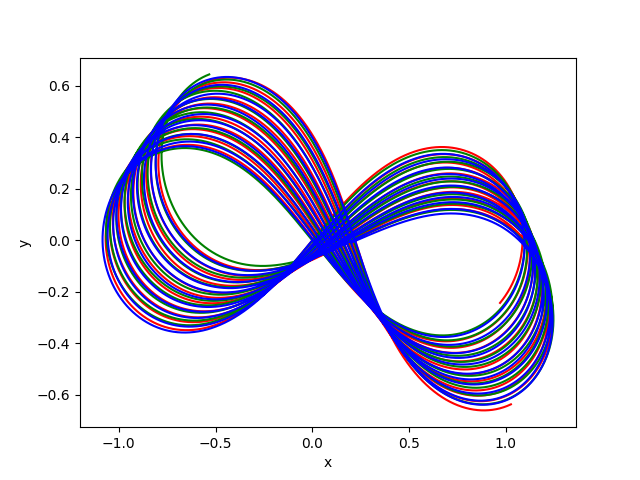

In [6]:
plt.figure()

t_filter = t > 0

plt.plot(r1[0, t_filter],r1[1, t_filter],'-r')
plt.plot(r2[0, t_filter],r2[1, t_filter],'-g')
plt.plot(r3[0, t_filter],r3[1, t_filter],'-b')

plt.xlabel("x")
plt.ylabel("y")

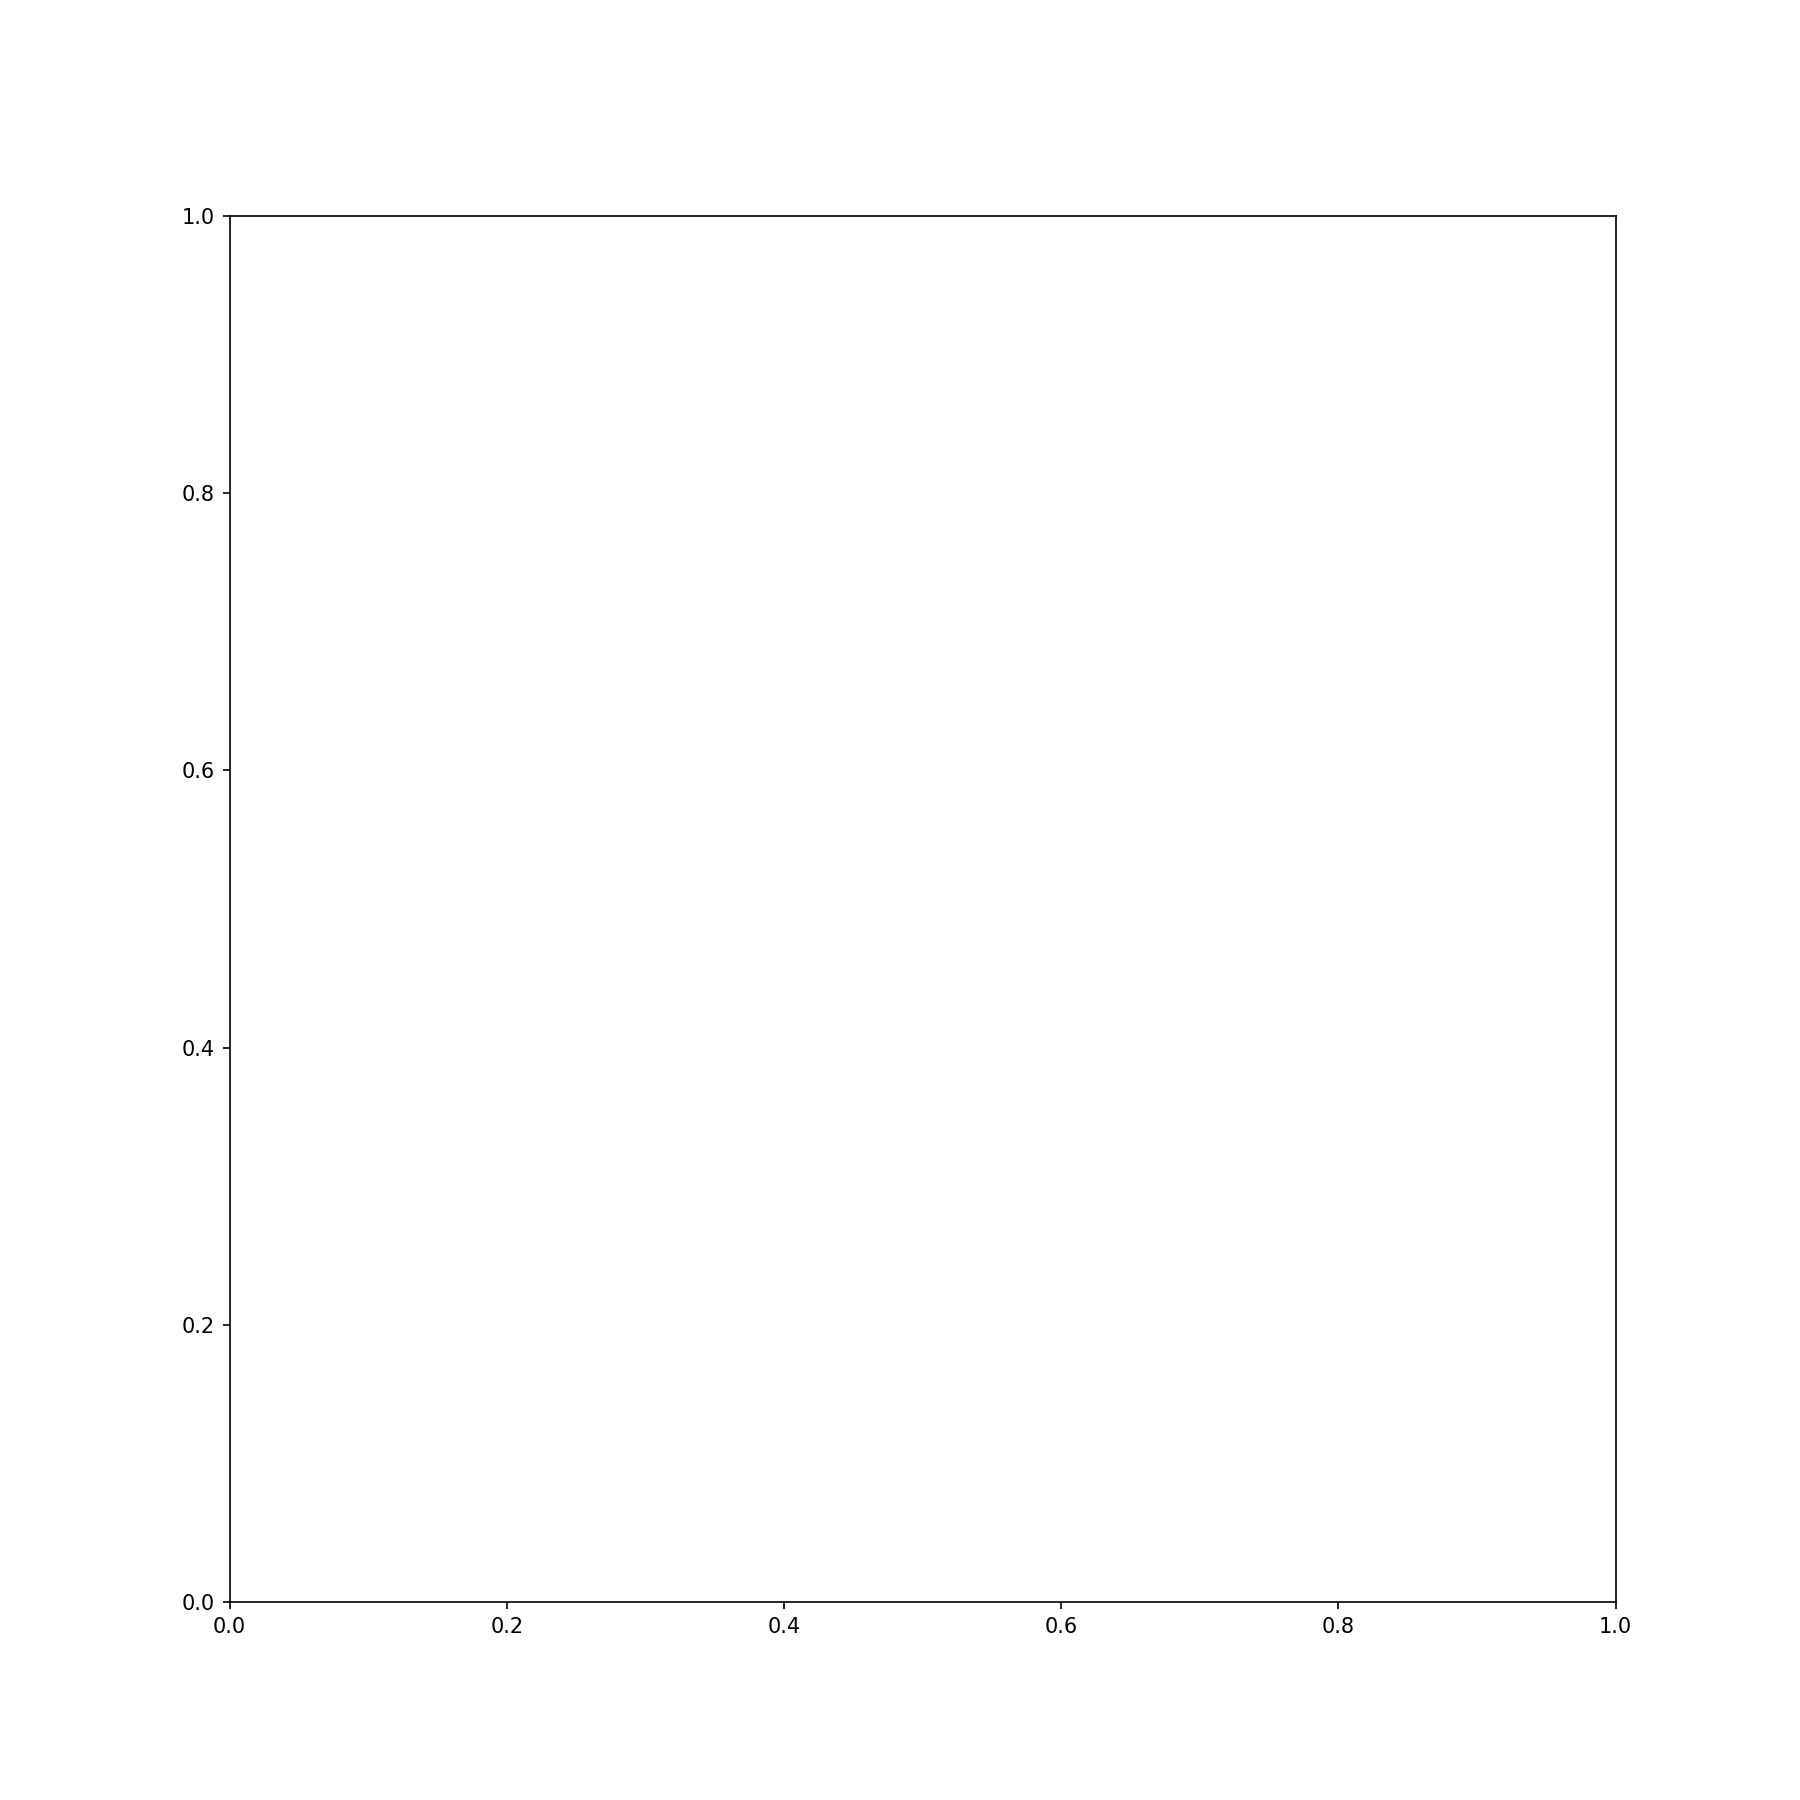

In [7]:
def make_plot(i):

    trail_secs = 20                    # length of the trail in units of time
    max_trail  = int(trail_secs / dt)  # length of the trail in time steps
    r = 0.1 # radius of circle
    
    c1 = Circle((x1[i], y1[i]), r, fc='r', ec='r', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='g', ec='g', zorder=10)
    c3 = Circle((x3[i], y3[i]), r, fc='b', ec='b', zorder=10)

    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s  = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        
        # The fading looks better if we square the fractional length along the
        # trail.
        
        alpha = (j/ns)**2
        
        ax.plot(x1[imin:imax], y1[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)
        
        ax.plot(x2[imin:imax], y2[imin:imax], c='g', solid_capstyle='butt',
                lw=2, alpha=alpha)

        ax.plot(x3[imin:imax], y3[imin:imax], c='b', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames/img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()

# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1

fps = 10
di  = int(1/fps/dt)
fig = plt.figure(figsize=(12, 12), dpi=150)
ax  = fig.add_subplot(111)

for i in range(0, t.size, di):
    make_plot(i)